<a href="https://colab.research.google.com/github/SudarshanIngole/Machine-Learning-Projects/blob/main/PRCP_FIFA_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:- Explore football skills and cluster football players based on their attributes.
* Task3:- Explore the data and attempt all the below asked questions in a
step by step manner:
* ● Prepare a rank ordered list of top 10 countries with most players. Which
countries are producing the most footballers that play at this level?
* ● Plot the distribution of overall rating vs. age of players. Interpret what is the
age after which a player stops improving?
* ● Which type of offensive players tends to get paid the most: the striker, the
right-winger, or the left-winger?

* Some ideas of possible analysis:
* ● Historical comparison between Messi and Ronaldo (what skill attributes
changed the most during time - compared to real-life stats);
* ● Ideal budget to create a competitive team (at the level of top n teams in
Europe) and at which point the budget does not allow to buy significantly
better players for the 11-men lineup. An extra is the same comparison with
the Potential attribute for the lineup instead of the Overall attribute;

* Sample analysis of top n% players (e.g. top 5% of the player) to see if some
important attributes such as Agility or BallControl or Strength have been
popular or not across the FIFA versions.
* An example would be seeing that
the top 5% players of FIFA 20 are faster (higher Acceleration and Agility)
compared to FIFA 15. The trend of attributes is also an important indication
of how some attributes are necessary for players to win games (a version
with more top 5% players with high BallControl stats would indicate that the
game is more focused on the technique rather than the physical aspect).

This is the FIFA20 Dataset.
It has a huge records.
Let's analyse the data.

---



Exploratory Data Analysis

---



In [ ]:
data = pd.read_csv('/content/players_20.csv')


**We are checking the top 5 records of dataset**

In [ ]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


Bottom 5 records of dataset

In [ ]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [ ]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


Univariate Ananlysis

* Describe function shows the numerical columns/features information like mean of the column, maximum value minimum value etc.
* Height  == max. height = 205 cm, minimum height = 181.4 cm
* Weight == max weight = 110 kg, minimum weight = 75 kg
* Average Age 26 years


In [ ]:
data.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,682,636,636,636,682,667,621,621,621,667


*

In [ ]:
len(data.columns)
len(data)

print(("Total Number of columns"),len(data.columns))
print(('Total Number of Rows'),len(data))

Total Number of columns 104
Total Number of Rows 18278


In [ ]:
column_names = list(data.columns[0:29])
print(column_names, end = ' ')


['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until'] 

* Analysing the Column one by one
* First we are going to analyse the column "Age"

In [ ]:
data["age"]

0        32
1        34
2        27
3        26
4        28
         ..
18273    22
18274    22
18275    19
18276    18
18277    26
Name: age, Length: 18278, dtype: int64

In [ ]:
print(data['age'].max())
print(data['age'].min())

42
16


* The maximum age of a player is 42
* The minimum age of a player is 16

In [ ]:
data.loc[data['age']==data['age'].max(), data.columns[:15]]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions
11832,142998,https://sofifa.com/player/142998/cristian-muno...,C. Muñoz,Cristian Fernando Muñoz Hoffman,42,1977-07-01,177,73,Argentina,CD Universidad de Concepción,64,64,50000,1000,GK
13003,208927,https://sofifa.com/player/208927/hussain-omar-...,H. Sulaimani,Hussein Omar Abdul Ghani Sulaimani,42,1977-01-21,173,70,Saudi Arabia,Al Ahli,63,63,0,5000,LB


Ther are total 2 players who are 42 years old.

In [ ]:
data.loc[data['age']==data['age'].min(), data.columns[:30]]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position
4764,246618,https://sofifa.com/player/246618/adam-hlozek/2...,A. Hložek,Adam Hložek,16,2002-07-25,185,80,Czech Republic,Sparta Praha,...,Normal,No,9900000.0,NaN,RM,20.0,NaN,2018-01-01,2022.0,NaN
6630,252037,https://sofifa.com/player/252037/fabio-daniel-...,Fábio Silva,Fábio Daniel Soares Silva,16,2002-07-19,185,75,Portugal,FC Porto,...,Normal,No,4700000.0,NaN,SUB,49.0,NaN,2019-07-01,2022.0,NaN
12158,252259,https://sofifa.com/player/252259/enzo-millot/2...,E. Millot,Enzo Millot,16,2002-07-17,175,65,France,AS Monaco,...,Lean,No,2300000.0,NaN,RES,49.0,NaN,2019-07-30,2022.0,NaN
12160,247888,https://sofifa.com/player/247888/sebastiano-es...,S. Esposito,Sebastiano Esposito,16,2002-07-02,186,75,Italy,Inter,...,Lean,No,2200000.0,NaN,SUB,70.0,NaN,2019-01-23,2022.0,NaN
14626,252238,https://sofifa.com/player/252238/alan-velasco/...,A. Velasco,Alan Velasco,16,2002-07-27,167,63,Argentina,Independiente,...,Lean,No,1100000.0,NaN,SUB,9.0,NaN,2018-07-01,2022.0,NaN
17614,248187,https://sofifa.com/player/248187/daniel-obbekj...,D. Obbekjær,Daniel Obbekjær,16,2002-07-16,193,86,Denmark,Odense Boldklub,...,Lean,No,206000.0,NaN,SUB,22.0,NaN,2019-04-01,2021.0,NaN
17782,248567,https://sofifa.com/player/248567/sebastian-and...,S. Anderson,Sebastian Anderson,16,2002-08-08,175,64,United States,Colorado Rapids,...,Lean,No,245000.0,NaN,SUB,22.0,NaN,2019-04-03,2023.0,NaN
17827,251219,https://sofifa.com/player/251219/darragh-burns...,D. Burns,Darragh Burns,16,2002-08-06,176,62,Northern Ireland,St. Patrick's Athletic,...,Lean,No,218000.0,NaN,SUB,35.0,NaN,2019-06-08,2020.0,NaN
18031,246815,https://sofifa.com/player/246815/oliver-stefan...,O. Stefánsson,Oliver Stefánsson,16,2002-08-03,190,75,Iceland,IFK Norrköping,...,Lean,No,113000.0,NaN,RES,26.0,NaN,2019-01-01,2022.0,NaN
18171,252892,https://sofifa.com/player/252892/joseph-starbu...,J. Starbuck,Joseph Starbuck,16,2002-08-03,174,69,England,Grimsby Town,...,Normal,No,165000.0,NaN,RES,29.0,NaN,2019-07-01,2023.0,NaN


There are total 12 players, who are 16 years old.

In [ ]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [ ]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


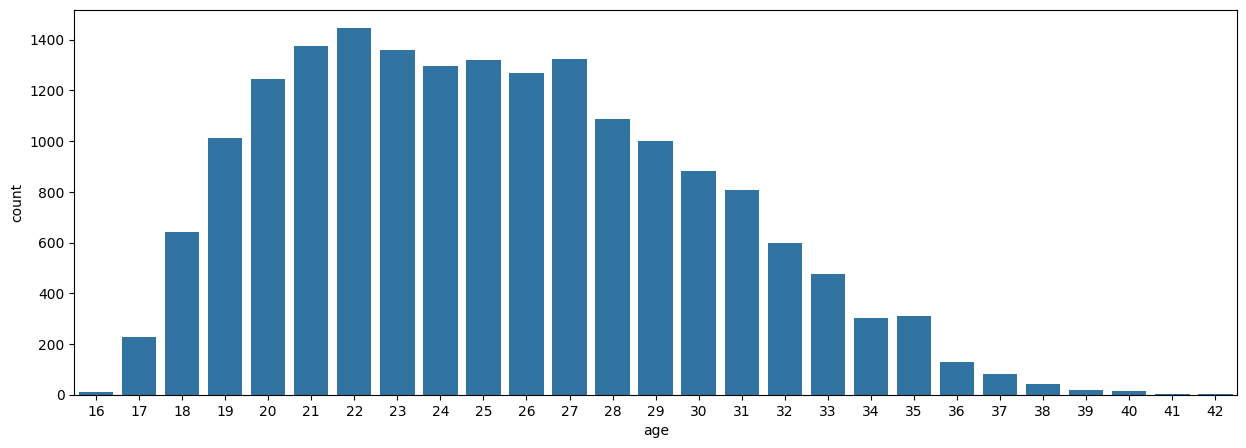

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=data)
plt.show()

* ## From the above graph we can see that most of the players are in between 20  to 30 years of Age.

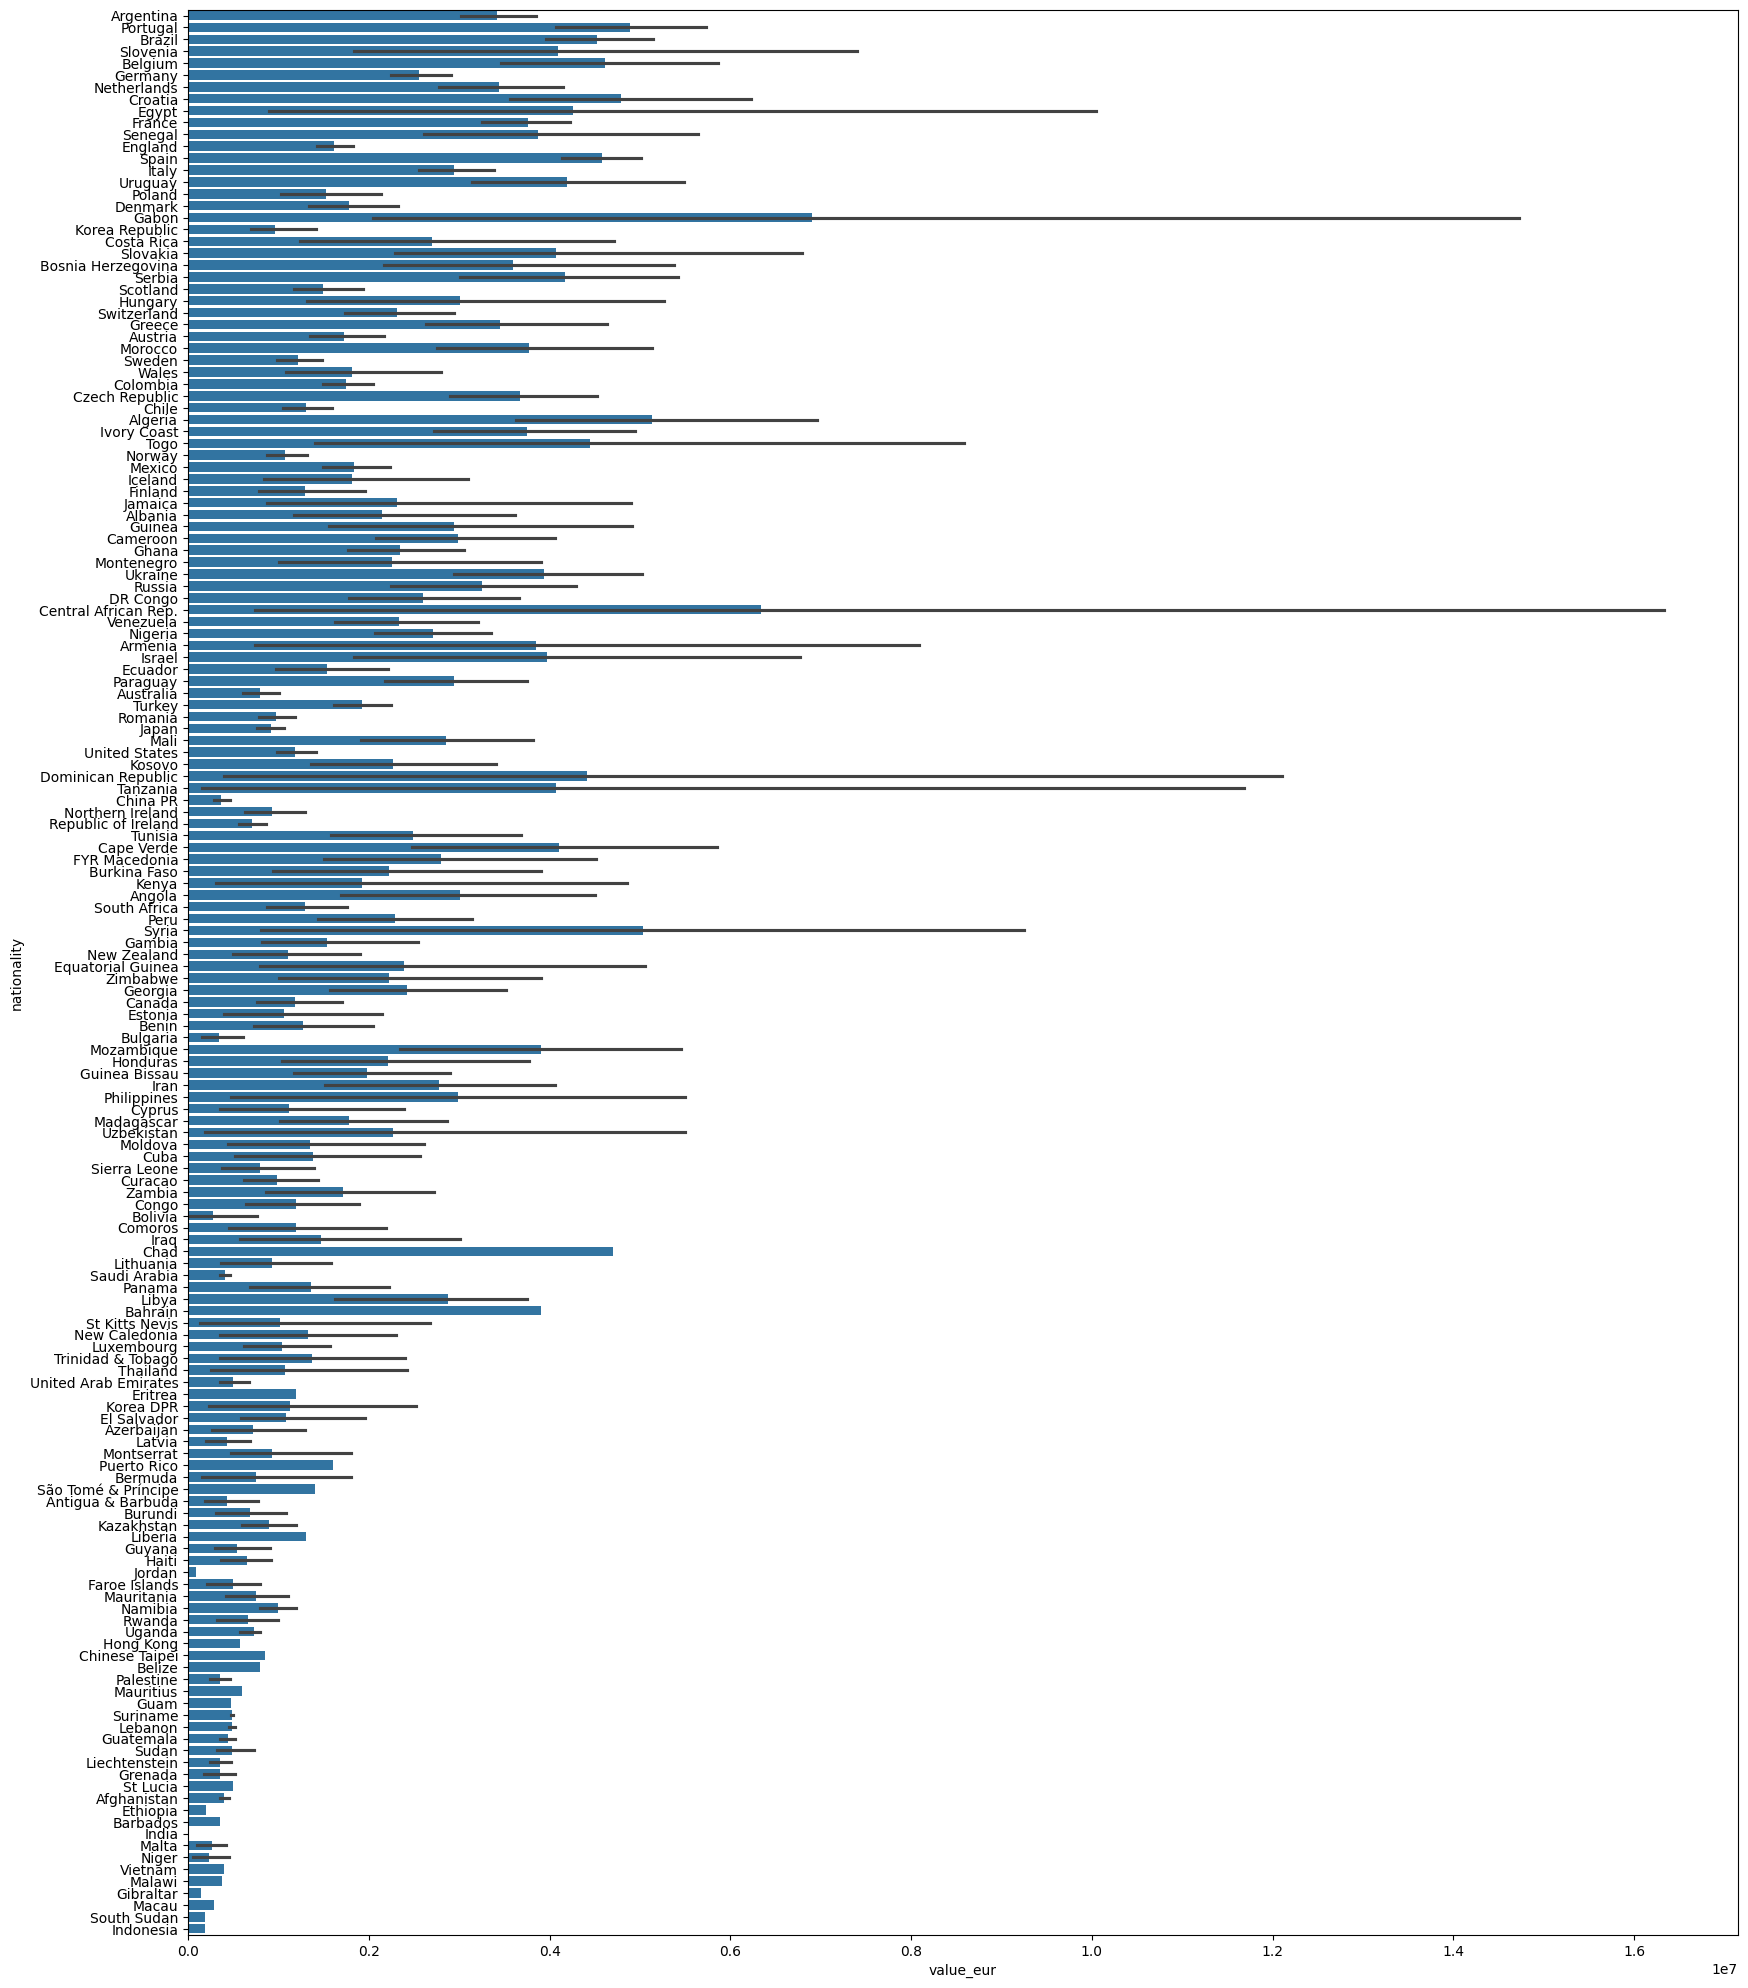

In [ ]:
plt.figure(figsize=(20,25))
sns.barplot(x='value_eur',y='nationality', data=data)
plt.show()

* Central African Republic country has maximun value in euro.


In [ ]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [ ]:
data.value_eur.max()

105500000

In [ ]:
min_value_country = data[data['value_eur'] == data['value_eur'].min()]['nationality'].values[0]
print(f"Country with minimum 'value_eur' price: {min_value_country}")


Country with minimum 'value_eur' price: Uruguay


In [ ]:
data['nationality']

0        Argentina
1         Portugal
2           Brazil
3         Slovenia
4          Belgium
           ...    
18273     China PR
18274     China PR
18275     China PR
18276     China PR
18277     China PR
Name: nationality, Length: 18278, dtype: object

In [ ]:
data.loc[data['nationality'] == 'Uruguay']


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
19,176580,https://sofifa.com/player/176580/luis-suarez/2...,L. Suárez,Luis Alberto Suárez Díaz,32,1987-01-24,182,86,Uruguay,FC Barcelona,...,67+5,67+5,67+5,67+5,67+5,64+5,63+5,63+5,63+5,64+5
34,179813,https://sofifa.com/player/179813/edinson-cavan...,E. Cavani,Edinson Roberto Cavani Gómez,32,1987-02-14,185,77,Uruguay,Paris Saint-Germain,...,68+3,66+3,66+3,66+3,68+3,66+3,65+3,65+3,65+3,66+3
35,182493,https://sofifa.com/player/182493/diego-godin/2...,D. Godín,Diego Godín,33,1986-02-16,187,78,Uruguay,Inter,...,74+3,80+3,80+3,80+3,74+3,77+3,86+3,86+3,86+3,77+3
83,216460,https://sofifa.com/player/216460/jose-maria-gi...,J. Giménez,José María Giménez de Vargas,24,1995-01-20,185,80,Uruguay,Atlético Madrid,...,71+2,74+2,74+2,74+2,71+2,74+2,83+2,83+2,83+2,74+2
244,223959,https://sofifa.com/player/223959/lucas-torreir...,L. Torreira,Lucas Torreira Di Pascua,23,1996-02-11,168,64,Uruguay,Arsenal,...,80+2,81+2,81+2,81+2,80+2,79+2,77+2,77+2,77+2,79+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15114,252762,https://sofifa.com/player/252762/steve-makuka/...,S. Makuka,Steve Makuka,24,1994-11-26,180,75,Uruguay,Atlético Bucaramanga,...,48+2,49+2,49+2,49+2,48+2,52+2,58+2,58+2,58+2,52+2
15309,247403,https://sofifa.com/player/247403/rodrigo-cabre...,R. Cabrera,Rodrigo Cabrera,30,1989-05-02,187,75,Uruguay,CD Cobresal,...,51+2,52+2,52+2,52+2,51+2,53+2,59+2,59+2,59+2,53+2
15381,240835,https://sofifa.com/player/240835/edgar-elizald...,E. Elizalde,Edgar Joel Elizalde Ferreira,19,2000-02-27,179,78,Uruguay,Pescara,...,57+2,54+2,54+2,54+2,57+2,57+2,58+2,58+2,58+2,57+2
15716,252761,https://sofifa.com/player/252761/joaquin-gotte...,J. Gottesman,Joaquín Gottesman,23,1996-02-05,175,68,Uruguay,Atlético Huila,...,58+2,57+2,57+2,57+2,58+2,59+2,57+2,57+2,57+2,59+2


In [ ]:
pd.set_option('display.max_column', None)
data.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


 * As there are many columns, let's first analyze few of the columns. The columns which we are first going to analyze are : ['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur']

In [ ]:
data1=data[['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur']]

In [ ]:
data1

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0


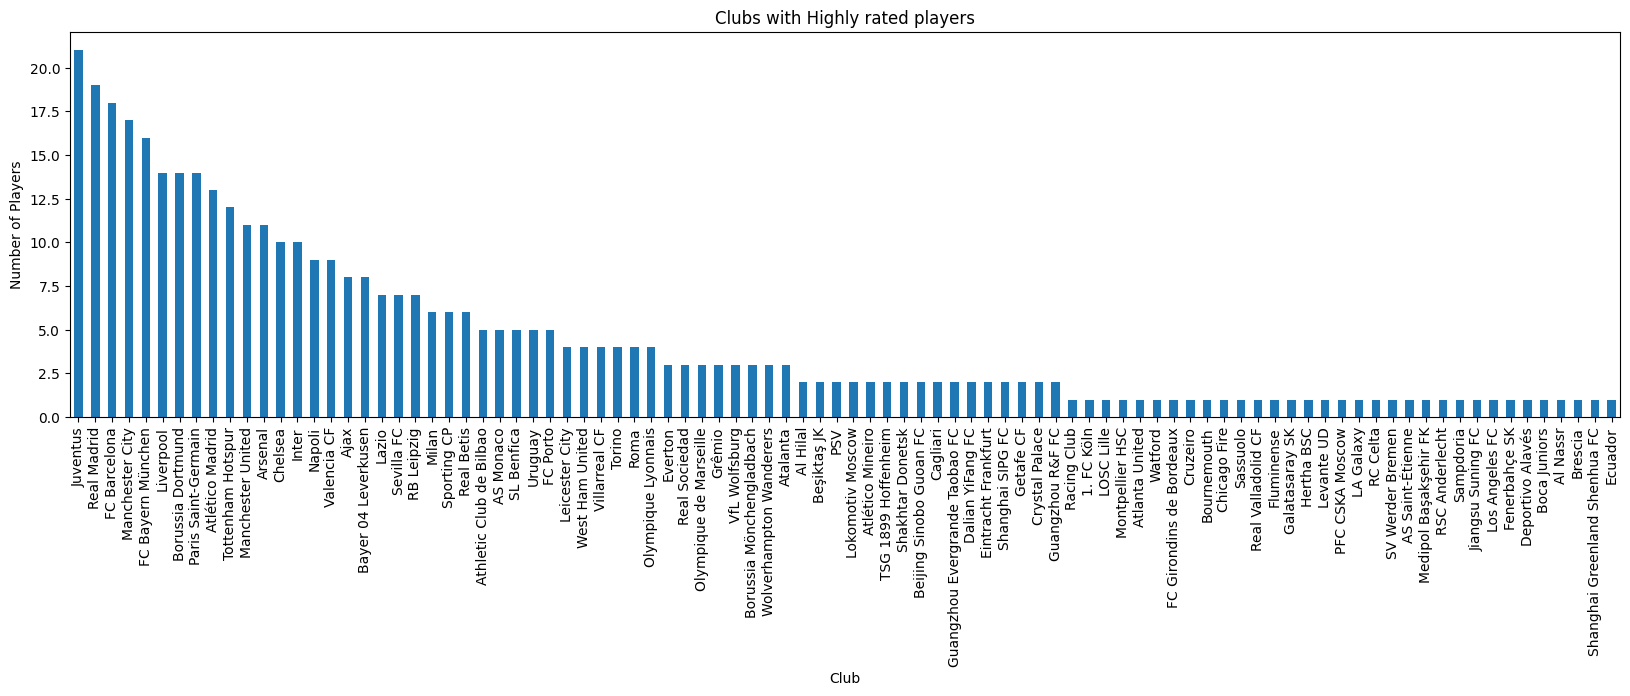

In [ ]:
plt.figure(figsize=(20,5))
high_rated_players = data1[data1['overall'] > 80]
club_counts = high_rated_players['club'].value_counts()
club_counts.plot(kind='bar', xlabel='Club', ylabel='Number of Players', title='Clubs with Highly rated players')
plt.show()

In [ ]:
print('The Overall mean from the dataset is : ',data['overall'].mean())
print('The Overall maxumum value from the dataset is : ',data['overall'].max())
print('The Overall minimum value from  the dataset is : ',data['overall'].min())

The Overall mean from the dataset is :  66.24499398183609
The Overall maxumum value from the dataset is :  94
The Overall minimum value from  the dataset is :  48


* Lets See the Column Named "International_reputation".
*

In [ ]:
data.international_reputation.unique()

array([5, 3, 4, 2, 1])

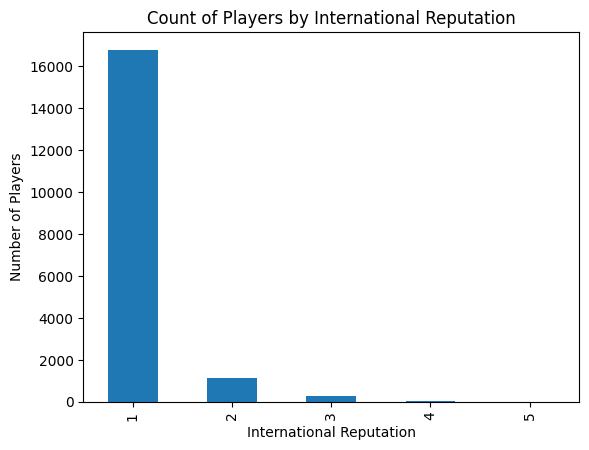

In [ ]:
data['international_reputation'].value_counts().plot(kind='bar')
plt.title('Count of Players by International Reputation')
plt.xlabel('International Reputation')
plt.ylabel('Number of Players')
plt.show()

In [ ]:
data['international_reputation'].value_counts()

international_reputation
1    16794
2     1140
3      292
4       46
5        6
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='potential'>

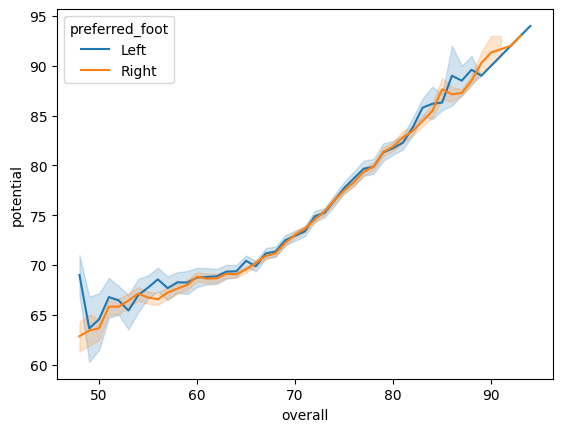

In [12]:
sns.lineplot(x='overall', y='potential', data=data, hue='preferred_foot')
plt.title('Relation between overall vs Potential with ')
plt.show()

In [15]:
data.preferred_foot.unique()

array(['Left', 'Right'], dtype=object)

<Axes: xlabel='overall', ylabel='age'>

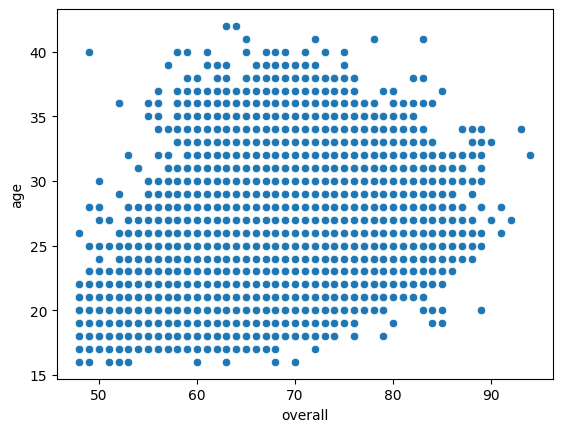

In [17]:
sns.scatterplot(x='overall', y='age', data=data)

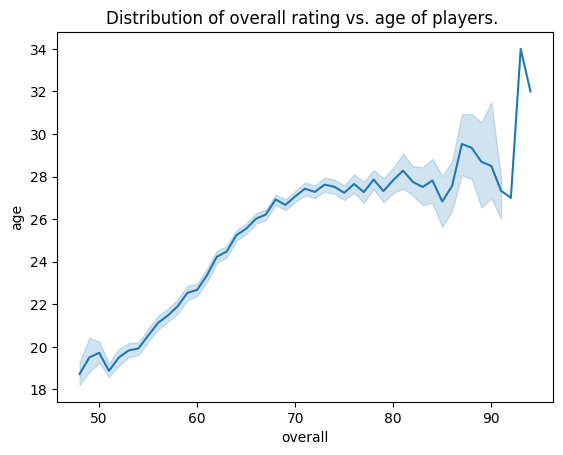

In [21]:
sns.lineplot(x='overall', y='age', data=data)
plt.title('Distribution of overall rating vs. age of players. ')
plt.show()

*

In [25]:
data.overall.min()
data.overall.max()

94